<a href="https://colab.research.google.com/github/10kagan/AmazonTest/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [18]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [25]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [26]:
# read the data
df = pd.read_csv('gdrive/My Drive/Python Class/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [27]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [30]:
# Use info() to print a concise summary of the DataFrame
df.info()
# According to the info() method there are four int64, four objects and one float64 data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [29]:
missing_values_sum = df.isnull().sum()
missing_values_sum
# There is no missing value

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [32]:
df.describe().T
# food_preparation_time:
# Minimum = 20
# Average = 27.3
# Maximum = 35

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [33]:
df['rating'].value_counts()['Not given']

736

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

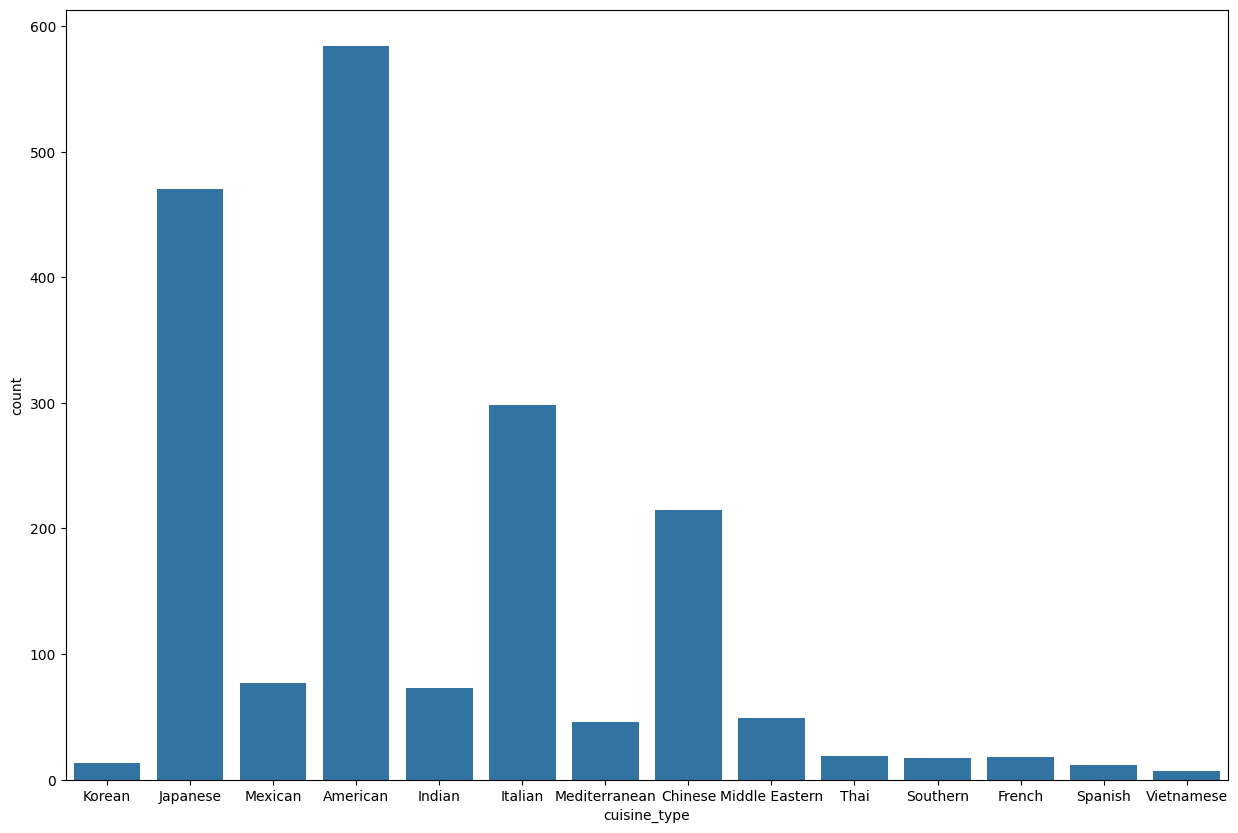

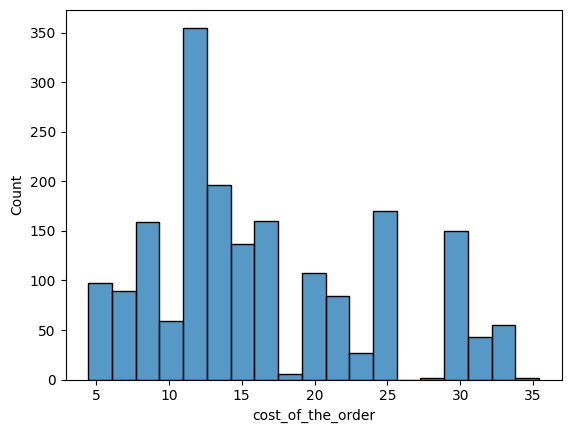

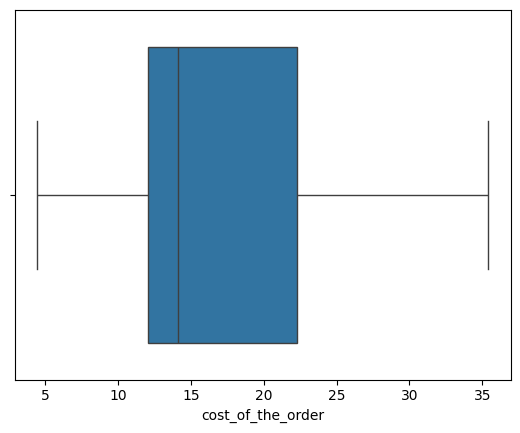

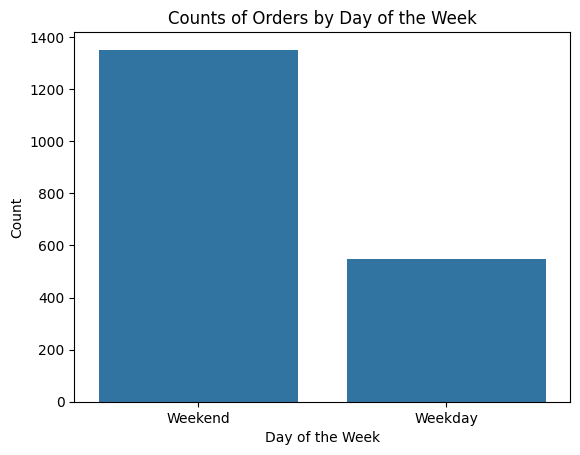

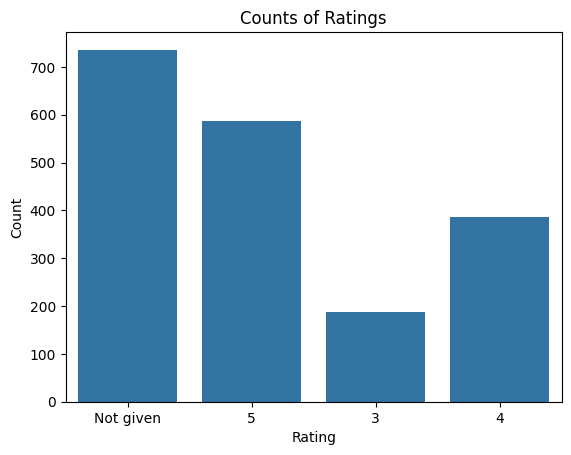

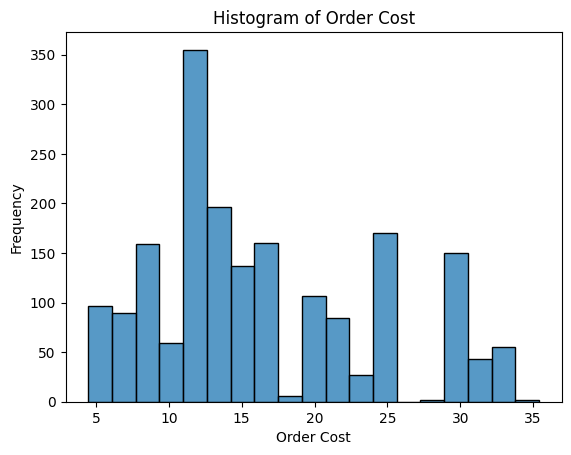

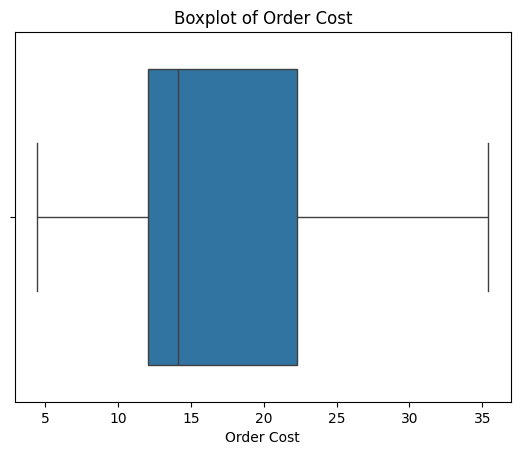

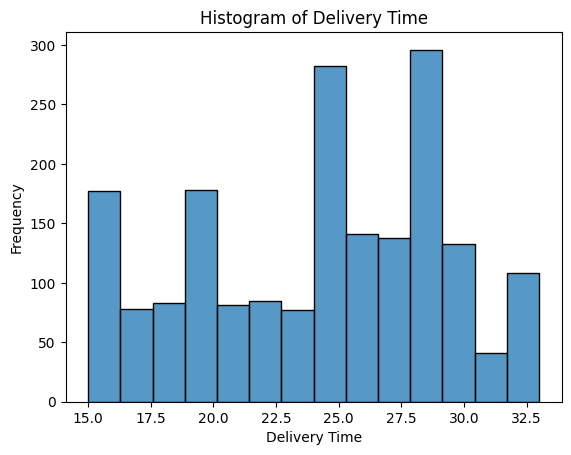

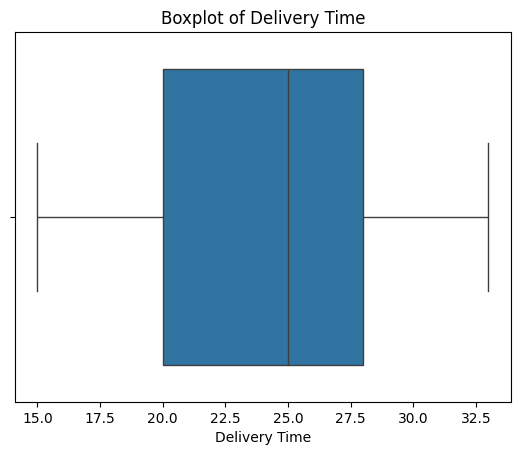

In [36]:
# check unique orderID
df['order_id'].nunique()

unique_customer_ids = df['customer_id'].nunique()

# Find out number of unique Restaurant Name
df['restaurant_name'].nunique()


# Check unique cuisine type
# Find out  number of  unique cuisine type
df['cuisine_type'].nunique()

plt.figure(figsize = (15,10))
# Create a countplot for cuisine type
sns.countplot(data = df, x = 'cuisine_type')
plt.show()

# Histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
# Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

# # Check the unique values
unique_days_of_week = df['day_of_the_week'].unique()


sns.countplot(data=df, x='day_of_the_week')
plt.title('Counts of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()


# Check the unique values
# Check unique values for the 'rating' column
df['rating'].unique()


sns.countplot(data=df, x='rating')
plt.title('Counts of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot histogram for the cost of order
sns.histplot(data=df, x='cost_of_the_order')
plt.title('Histogram of Order Cost')
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot for the cost of order
sns.boxplot(data=df, x='cost_of_the_order')
plt.title('Boxplot of Order Cost')
plt.xlabel('Order Cost')
plt.show()

# Plot histogram for delivery time
sns.histplot(data=df, x='delivery_time')
plt.title('Histogram of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot for delivery time
sns.boxplot(data=df, x='delivery_time')
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
top_counts = df['restaurant_name'].value_counts().head()
top_counts

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = df_weekend['cuisine_type'].value_counts().head(1)
most_popular_cuisine

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [37]:
# Assuming 'df' is your DataFrame and 'order_cost' is the name of the column representing the order cost
df_greater_than_20 = df[df['cost_of_the_order'] > 20]  # Assuming 'order_cost' is the column representing the order cost

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of cost more than 20 dollars orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders more than 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders more than 20 dollars: 29.24 %


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [39]:
# Find the mean delivery time
mean_del_time = df['delivery_time'].mean()

print('The mean order delivery time is', round(mean_del_time, 2), 'minutes')


The mean order delivery time is 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [40]:
top_customers = df['customer_id'].value_counts().head(3)
top_customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


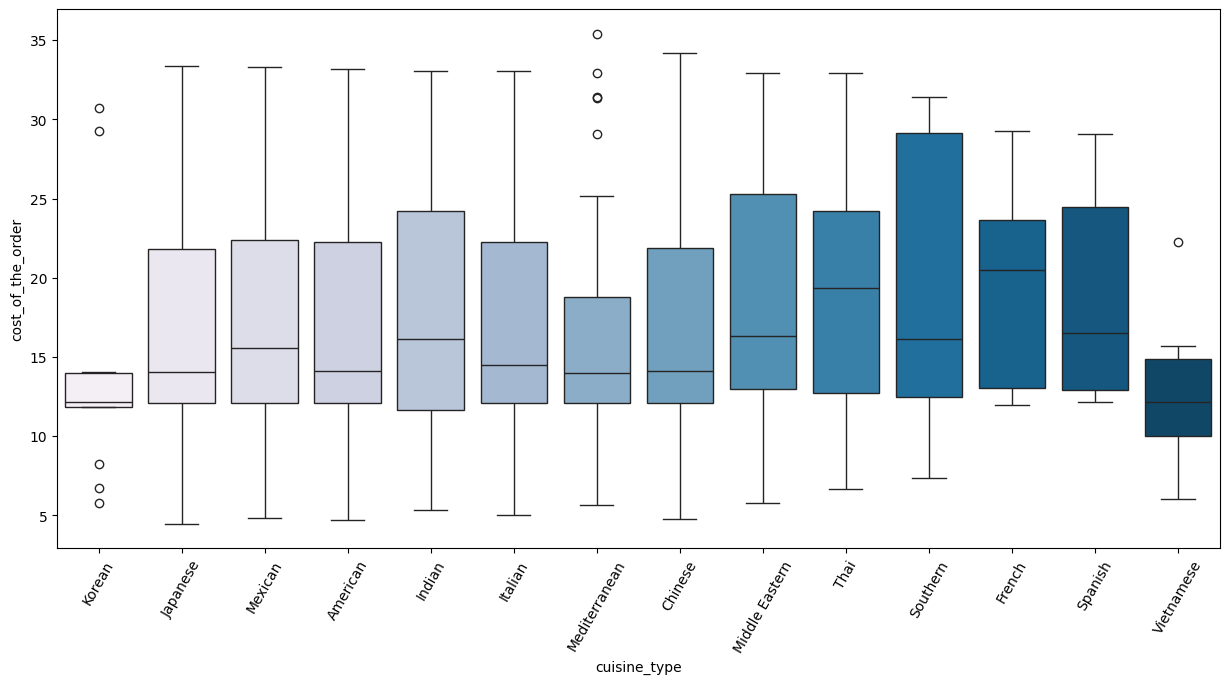

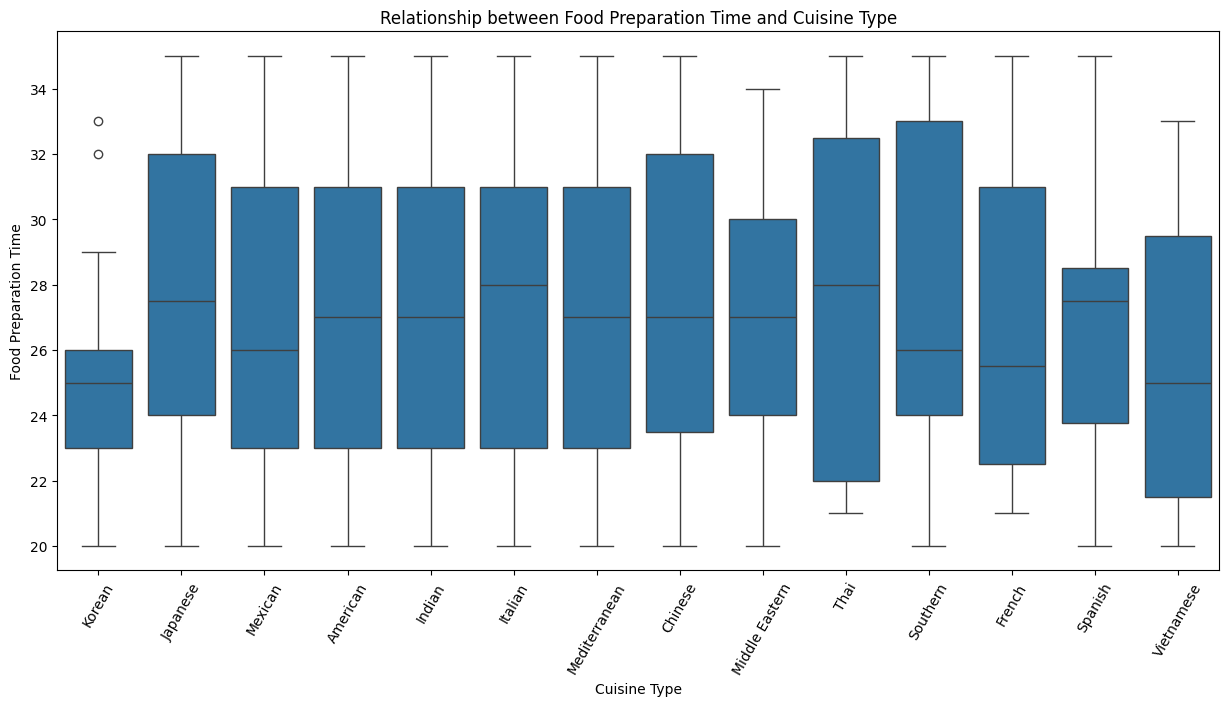

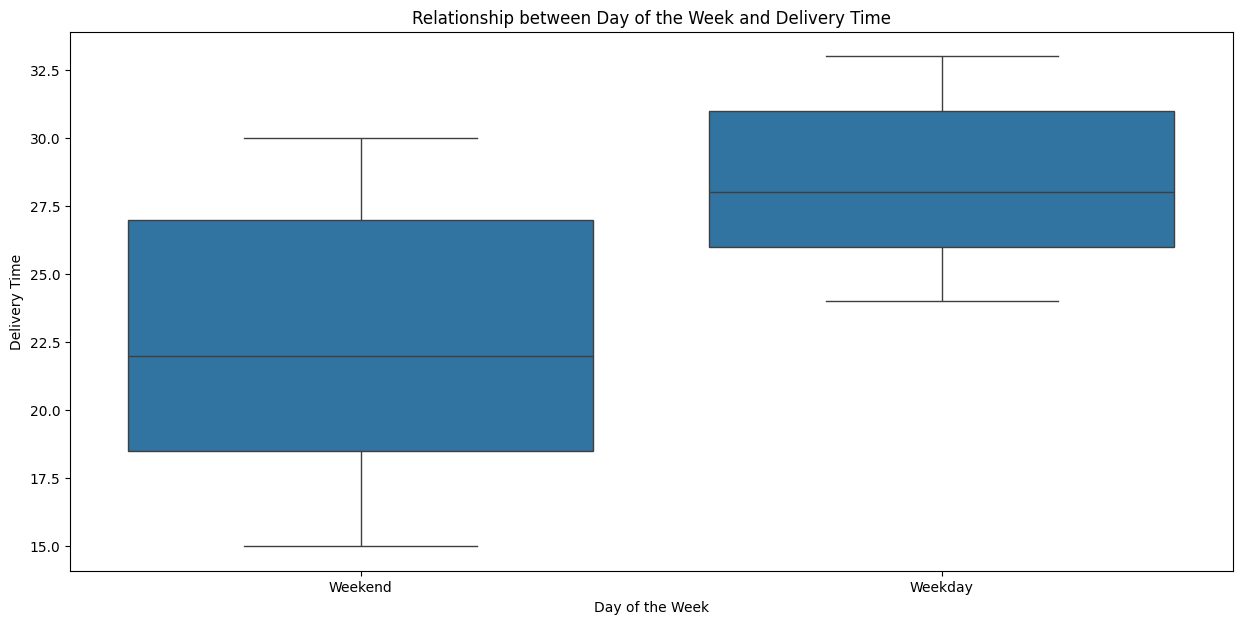

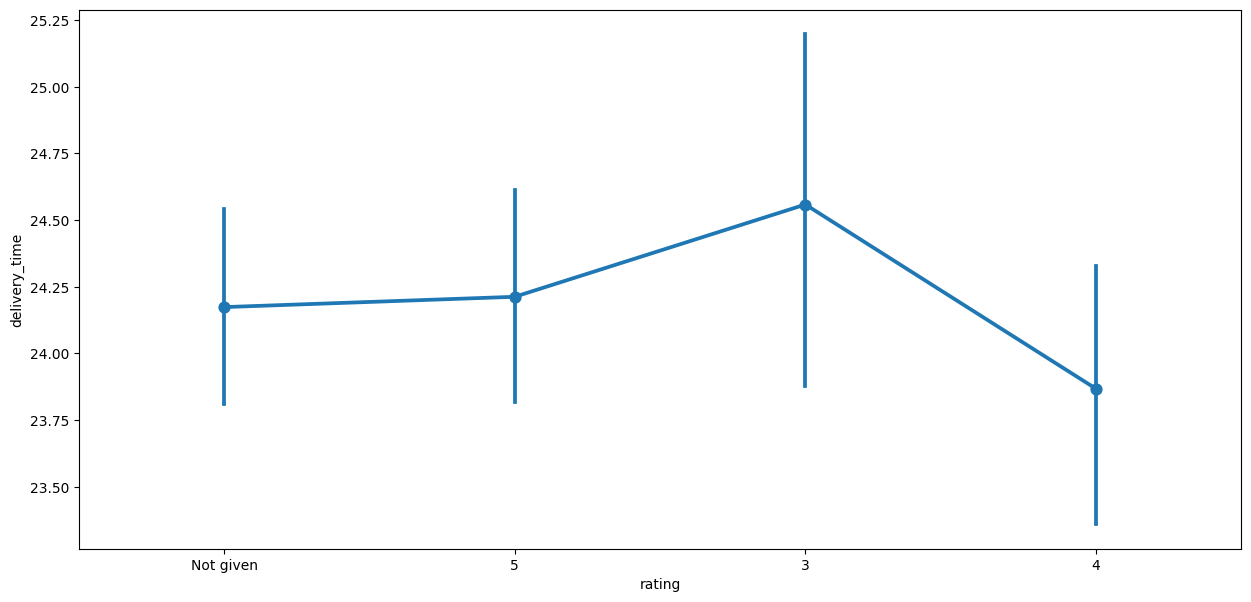

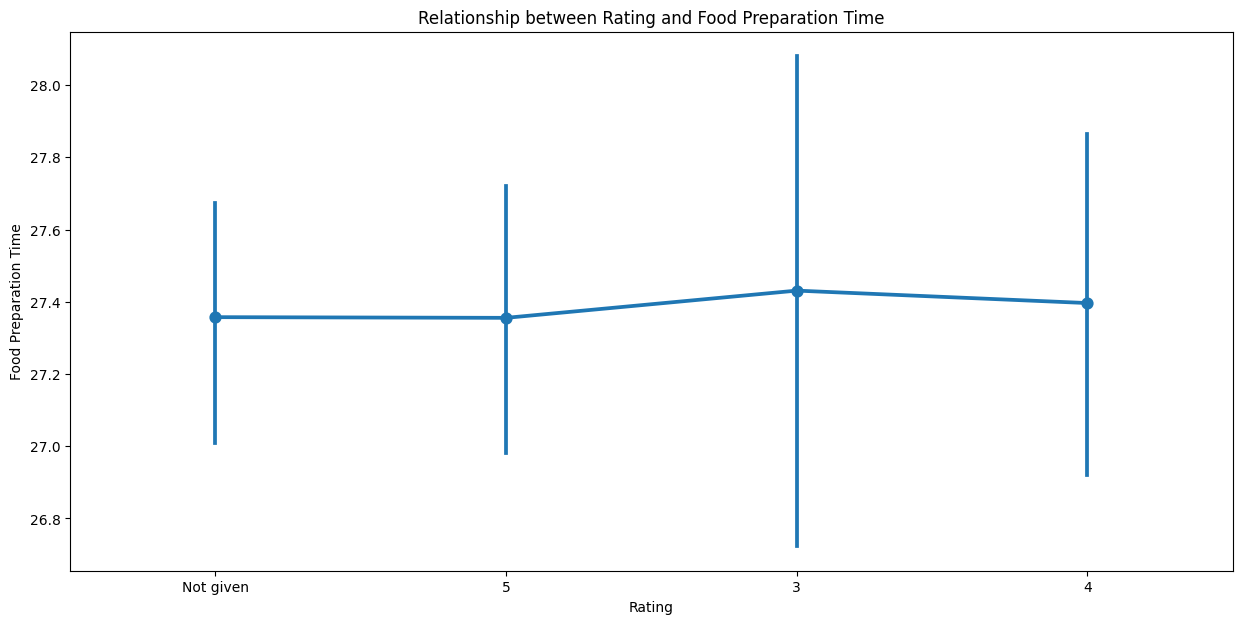

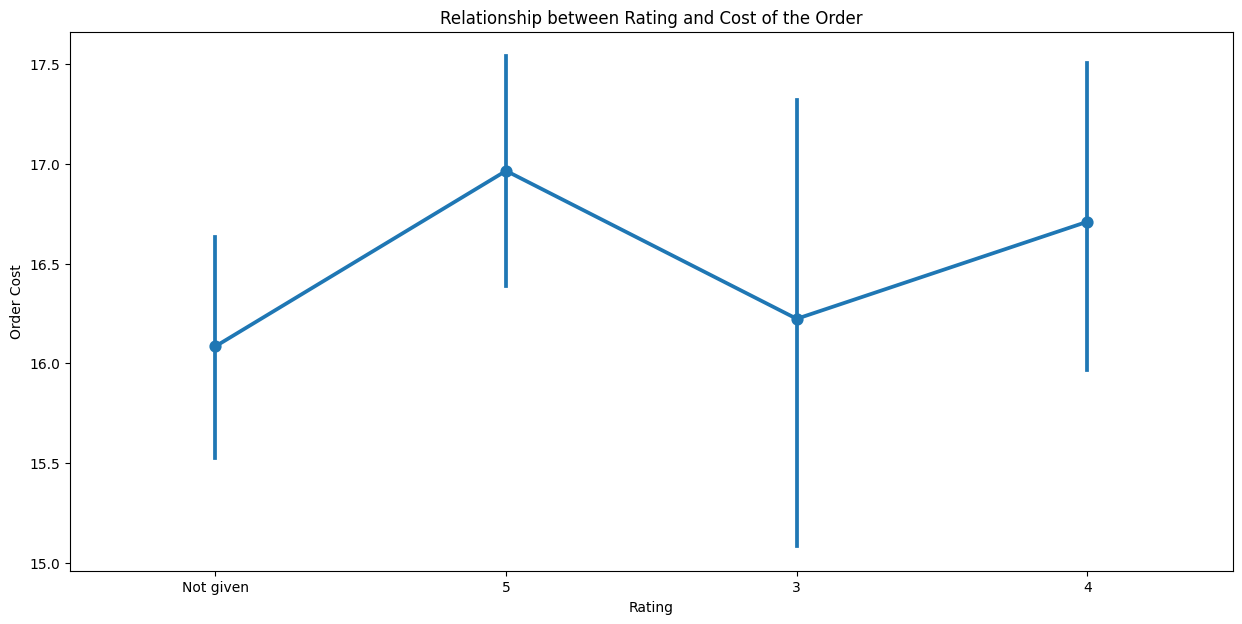

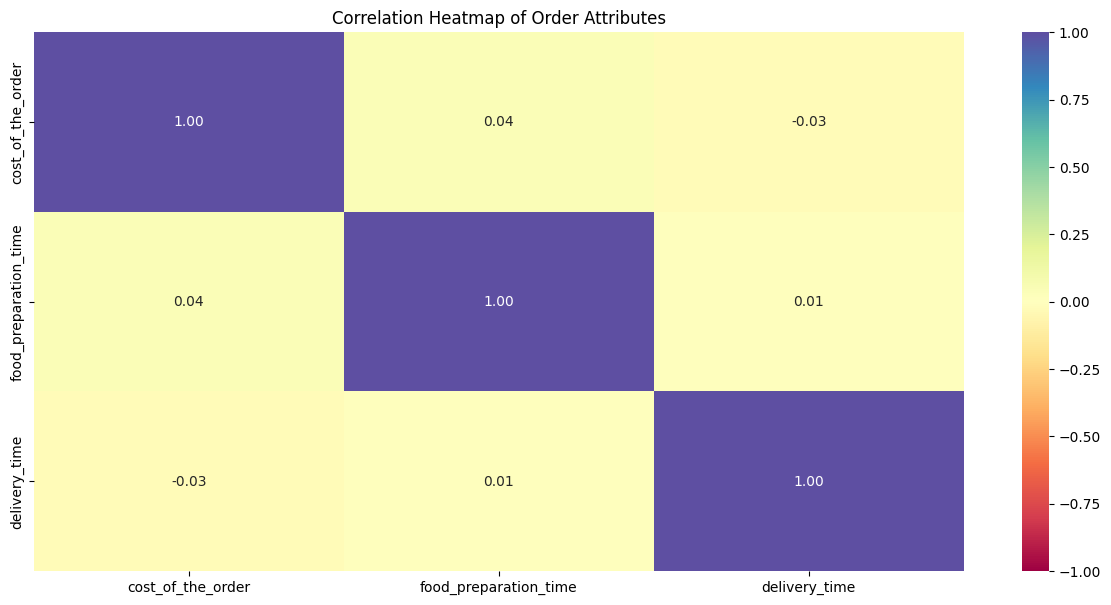

In [41]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue="cuisine_type", legend=False)
plt.xticks(rotation = 60)
plt.show()

# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15, 7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Relationship between Food Preparation Time and Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=60)
plt.show()

# Relationship between day of the week and delivery time
plt.figure(figsize=(15, 7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Relationship between Day of the Week and Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.title('Relationship between Rating and Food Preparation Time')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.show()

plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Relationship between Rating and Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Order Cost')
plt.show()

col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))

sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Correlation Heatmap of Order Attributes')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [42]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
mean_ratings = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

print(mean_ratings)


             restaurant_name    rating
0          The Meatball Shop  4.511905
1  Blue Ribbon Fried Chicken  4.328125
2                Shake Shack  4.278195
3          Blue Ribbon Sushi  4.219178


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [43]:
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)  # Assuming 'order_cost' is the column name for order cost
df.head()

# get the total revenue and print it
total_rev = df['Revenue'].sum()

print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [44]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Filter the DataFrame to include only orders with more than 60 minutes of total delivery time
df_more_than_60_minutes = df[df['total_time'] > 60]

# Calculate the percentage of orders with more than 60 minutes of total delivery time
percentage_more_than_60_minutes = (len(df_more_than_60_minutes) / len(df)) * 100

print("Percentage of orders with more than 60 minutes of total delivery time:", round(percentage_more_than_60_minutes, 2), "%")


Percentage of orders with more than 60 minutes of total delivery time: 10.54 %


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [45]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()), 'minutes')

# Write the code here
# Calculate the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()), 'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Numerous orders contain incomplete details marked as 'Not given,' significantly influencing the outcome of our analysis. These instances of 'Not given' constitute approximately 39% of the entire order volume. Additionally, roughly 10% of all orders exhibit low ratings.

* A conspicuous correlation exists between the duration of food preparation and the monetary value of an order, directly impacting the revenue generated.

* Delivery durations exhibit a noticeable discrepancy between weekends and weekdays, with shorter times experienced during weekends despite a surge of approximately 2.5 times in order volume. This variance may be attributable to traffic congestion and a scarcity of delivery personnel on weekdays.

* The average expenditure per order stands at $16.50. A significant portion, accounting for 36.3% of all orders, surpasses this mean, totaling 689 orders in aggregate.

### Recommendations:

*  To increase profitability, the company must enhance its order volume. This can be achieved by optimizing delivery services and collaborating with restaurants to improve food quality and expediency.
* To boost weekday orders, the company should prioritize expediting deliveries, particularly during the lunchtime rush when working individuals have limited availability. One strategy entails incentivizing delivery personnel to utilize bicycles instead of cars, mitigating traffic-related delays. Augmenting the delivery team can also expedite service. Encouraging early shifts for delivery personnel ensures timely deliveries, fostering customer satisfaction and bolstering ratings.
* Collaborating with restaurants to expedite food preparation presents another avenue for augmenting order volume.
* To cultivate customer loyalty, the company can offer delivery fee discounts to its top 10 patrons. Rather than universally reducing delivery fees, the company can negotiate with restaurants to provide special rewards to these valued customers. Leveraging the satisfaction of these patrons, the company can engage in social media advertising.
* To elicit customer feedback, the company can solicit ratings from patrons via messaging services. Rewarding feedback with discounts, such as complimentary deliveries after a certain number of orders, incentivizes participation.








---